In [338]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import zipfile

# Data Visualization and Exploratory Data Analysis Lab
## Visualizing and exploring data. The data mining process

In this lab, you'll get acquainted with the most streamed songs on Spotify in 2024. The dataset and its associated metadata can be found [here](https://www.kaggle.com/datasets/nelgiriyewithana/most-streamed-spotify-songs-2024). The version you'll need is provided in the `data/` folder.

You know the drill. Do what you can / want / need to answer the questions to the best of your ability. Answers do not need to be trivial, or even the same among different people.

### Problem 1. Read the dataset (1 point)
Read the file without unzipping it first. You can try a different character encoding, like `unicode_escape`. Don't worry too much about weird characters.

In [339]:
with zipfile.ZipFile("data/spotify_most_streamed_2024.zip") as z:
    with z.open("Most Streamed Spotify Songs 2024.csv") as file:
        df = pd.read_csv(file, encoding="unicode_escape")

In [340]:
df

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",...,"2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",...,1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,For the Last Time,For the Last Time,$uicideboy$,9/5/2017,QM8DG1703420,"4,585",19.4,"305,049,963","65,770","5,103,054",...,NaN,2.0,"14,217",NaN,"20,104,066","13,184","50,633,006","656,337",NaN,1
4596,Dil Meri Na Sune,"Dil Meri Na Sune (From ""Genius"")",Atif Aslam,7/27/2018,INT101800122,"4,575",19.4,"52,282,360","4,602","1,449,767",...,NaN,1.0,927,NaN,NaN,NaN,NaN,"193,590",NaN,0
4597,Grace (feat. 42 Dugg),My Turn,Lil Baby,2/28/2020,USUG12000043,"4,571",19.4,"189,972,685","72,066","6,704,802",...,NaN,1.0,74,6.0,"84,426,740","28,999",NaN,"1,135,998",NaN,1
4598,Nashe Si Chadh Gayi,November Top 10 Songs,Arijit Singh,11/8/2016,INY091600067,"4,591",19.4,"145,467,020","14,037","7,387,064",...,NaN,NaN,NaN,7.0,"6,817,840",NaN,NaN,"448,292",NaN,0


### Problem 2. Perform some cleaning (1 point)
Ensure all data has been read correctly; check the data types. Give the columns better names (e.g. `all_time_rank`, `track_score`, etc.). To do so, try to use `apply()` instead of a manual mapping between old and new name. Get rid of any unnecessary ones.

In [341]:
df.dtypes

Track                          object
Album Name                     object
Artist                         object
Release Date                   object
ISRC                           object
All Time Rank                  object
Track Score                   float64
Spotify Streams                object
Spotify Playlist Count         object
Spotify Playlist Reach         object
Spotify Popularity            float64
YouTube Views                  object
YouTube Likes                  object
TikTok Posts                   object
TikTok Likes                   object
TikTok Views                   object
YouTube Playlist Reach         object
Apple Music Playlist Count    float64
AirPlay Spins                  object
SiriusXM Spins                 object
Deezer Playlist Count         float64
Deezer Playlist Reach          object
Amazon Playlist Count         float64
Pandora Streams                object
Pandora Track Stations         object
Soundcloud Streams             object
Shazam Count

In [342]:
new_column_names = []
for name in df.columns:
    new_name = name.replace(" ", "_").lower()
    new_column_names.append(new_name)

df.columns = new_column_names
df.columns

Index(['track', 'album_name', 'artist', 'release_date', 'isrc',
       'all_time_rank', 'track_score', 'spotify_streams',
       'spotify_playlist_count', 'spotify_playlist_reach',
       'spotify_popularity', 'youtube_views', 'youtube_likes', 'tiktok_posts',
       'tiktok_likes', 'tiktok_views', 'youtube_playlist_reach',
       'apple_music_playlist_count', 'airplay_spins', 'siriusxm_spins',
       'deezer_playlist_count', 'deezer_playlist_reach',
       'amazon_playlist_count', 'pandora_streams', 'pandora_track_stations',
       'soundcloud_streams', 'shazam_counts', 'tidal_popularity',
       'explicit_track'],
      dtype='object')

In [343]:
len(df.soundcloud_streams.unique())

1266

In [344]:
len(df.tidal_popularity.unique())

1

In [345]:
len(df.siriusxm_spins.unique())

690

In [346]:
## The columns used in the last three cells are too incomplete to use; we will delete them
df = df.drop(['soundcloud_streams', 'tidal_popularity', 'siriusxm_spins'], axis=1)

In [347]:
df = df.astype({'release_date': 'datetime64[ns]'})

In [348]:
df.release_date.dtype

dtype('<M8[ns]')

In [349]:
def remove_commas(el):
    return el.replace(",", "")

In [350]:
exceptions = ['track', 'album_name', 'artist', 'release_date', 'isrc', 'track_score', 'explicit_track']
for col in df.columns:
    if col in exceptions:
        pass
    else:
        df[col] = df[col].apply(lambda x: remove_commas(str(x)) if str(x) != 'nan' else '0')

In [351]:
df = df.astype({'all_time_rank': 'int64', 'spotify_streams': 'int64', 'spotify_playlist_count': 'int64', 
          'spotify_playlist_reach': 'int64', 'youtube_views': 'int64', 'youtube_likes': 'int64', 
          'tiktok_posts': 'int64', 'tiktok_likes': 'int64', 'tiktok_views': 'int64', 'youtube_playlist_reach': 'int64', 
          'airplay_spins': 'int64', 'deezer_playlist_reach': 'int64', 'pandora_streams': 'int64', 
          'pandora_track_stations': 'int64', 'shazam_counts': 'int64'})

In [352]:
df

,track,album_name,artist,release_date,isrc,all_time_rank,track_score,spotify_streams,spotify_playlist_count,spotify_playlist_reach,...,youtube_playlist_reach,apple_music_playlist_count,airplay_spins,deezer_playlist_count,deezer_playlist_reach,amazon_playlist_count,pandora_streams,pandora_track_stations,shazam_counts,explicit_track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,2024-04-26,QM24S2402528,1,725.4,390470936,30716,196631588,...,150597040,210.0,40975,62.0,17598718,114.0,18004655,22931,2669262,0
1,Not Like Us,Not Like Us,Kendrick Lamar,2024-05-04,USUG12400910,2,545.9,323703884,28113,174597137,...,156380351,188.0,40778,67.0,10422430,111.0,7780028,28444,1118279,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,2024-03-19,QZJ842400387,3,538.4,601309283,54331,211607669,...,373784955,190.0,74333,136.0,36321847,172.0,5022621,5639,5285340,0
3,Flowers,Flowers - Single,Miley Cyrus,2023-01-12,USSM12209777,4,444.9,2031280633,269802,136569078,...,3351188582,394.0,1474799,264.0,24684248,210.0,190260277,203384,11822942,0
4,Houdini,Houdini,Eminem,2024-05-31,USUG12403398,5,423.3,107034922,7223,151469874,...,112763851,182.0,12185,82.0,17660624,105.0,4493884,7006,457017,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,For the Last Time,For the Last Time,$uicideboy$,2017-09-05,QM8DG1703420,4585,19.4,305049963,65770,5103054,...,53016,3.0,6,2.0,14217,0,20104066,13184,656337,1
4596,Dil Meri Na Sune,"Dil Meri Na Sune (From ""Genius"")",Atif Aslam,2018-07-27,INT101800122,4575,19.4,52282360,4602,1449767,...,24973048,1.0,412,1.0,927,0,0,0,193590,0
4597,Grace (feat. 42 Dugg),My Turn,Lil Baby,2020-02-28,USUG12000043,4571,19.4,189972685,72066,6704802,...,29253152,19.0,204,1.0,74,6.0,84426740,28999,1135998,1
4598,Nashe Si Chadh Gayi,November Top 10 Songs,Arijit Singh,2016-11-08,INY091600067,4591,19.4,145467020,14037,7387064,...,25150516,1.0,1200,0,0,7.0,6817840,0,448292,0


### Problem 3. Most productive artists (1 point)
Who are the five artists with the most songs in the dataset?

Who are the five "clean-mouthed" artists (i.e., with no explicit songs)? **Note:** We're not going into details but we can start a discussion about whether a song needs swearing to be popular.

In [353]:
df.artist.value_counts().head(5)

artist
Drake           63
Taylor Swift    63
Bad Bunny       60
KAROL G         32
The Weeknd      31
Name: count, dtype: int64

In [354]:
artist_list = []

grouped_df = df.groupby(["artist", "explicit_track"], as_index=False).size()
grouped_df

,artist,explicit_track,size
0,"""XY""",0,1
1,$OHO BANI,1,1
2,$uicideboy$,1,9
3,&ME,0,1
4,(G)I-DLE,0,4
...,...,...,...
2207,ýýýýýýýýýýýýýýý ýýýýýýýýýýýýýýý,0,1
2208,ýýýýýýýýýýýýýýý(ýýýýýýýýýýýýýýý),0,1
2209,ýýýýýýýýýýýýýýýýýý,0,1
2210,ýýýýýýýýýýýýýýýýýýýýý ýýýýýýýýýýýýýýýýýýýýý,0,1


### Problem 4. Most streamed artists (1 point)
And who are the top five most streamed (as measured by Spotify streams) artists?

In [355]:
grouped_df_2 = df.drop(columns='release_date')
grouped_df_2 = grouped_df_2.groupby("artist", as_index=False).sum()
grouped_df_2[['artist', 'spotify_streams']].sort_values(by='spotify_streams', ascending=False).head(5)

,artist,spotify_streams
183,Bad Bunny,37054834425
1728,The Weeknd,36948540278
517,Drake,34962157577
1690,Taylor Swift,34470771165
1428,Post Malone,26137472958


### Problem 5. Songs by year and month (1 point)
How many songs have been released each year? Present an appropriate plot. Can you explain the behavior of the plot for 2024?

How about months? Is / Are there (a) popular month(s) to release music?

In [356]:
df.release_date.dt.year.value_counts()

release_date
2023    1158
2022     694
2024     693
2021     408
2020     360
2019     296
2018     249
2017     213
2016     123
2015      96
2014      70
2013      55
2011      51
2012      47
2010      27
2009      15
2008      11
2005       5
2004       5
2002       5
2007       5
2003       3
2006       3
2000       2
1994       1
1999       1
1987       1
1998       1
2001       1
1991       1
Name: count, dtype: int64

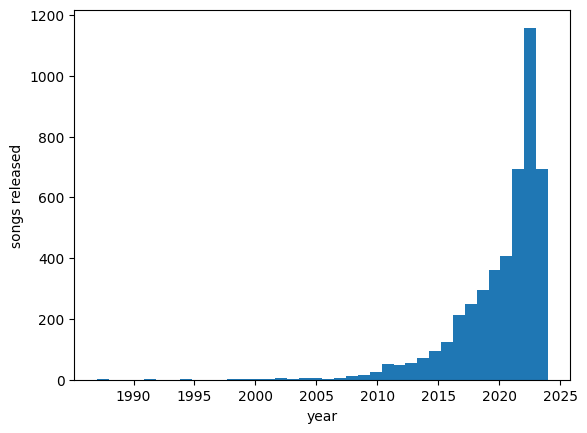

In [357]:
plt.hist(df.release_date.dt.year, bins=38)
plt.xlabel('year')
plt.ylabel('songs released')
plt.show()

In [358]:
# For 2024 there appears to be less songs than 2023
# However, as we are only 7 months into the year, it is too early to tell what the final result will be

df.release_date.dt.month.value_counts()

release_date
5     511
1     503
3     430
4     420
6     395
10    384
2     371
11    350
9     328
7     321
8     315
12    272
Name: count, dtype: int64

In [359]:
# The months data could be misleading when trying to determine a popular month to release music as the 2024 data is incomplete
# We will remove the 2024 data to determine the most popular months for releasing music

df[df.release_date.dt.year != 2024].release_date.dt.month.value_counts()

release_date
1     431
10    384
11    350
6     348
5     337
9     328
7     321
8     315
3     297
12    272
2     267
4     257
Name: count, dtype: int64

In [360]:
# Already, we can see a big difference, May is nowhere as near the top of the list and the autumn months are much higher up

### Problem 6. Playlists (2 points)
Is there any connection (correlation) between users adding a song to playlists in one service, or another? Only Spotify, Apple, Deezer, and Amazon offer the ability to add a song to a playlist. Find a way to plot all these relationships at the same time, and analyze them. Experiment with different types of correlations.

In [361]:
# We will take the top 5 most successful songs on Spotify (based on playlist count) from the dataset to analyze
observations = df.sort_values(by='spotify_playlist_count', ascending=False).head(5)
observations

,track,album_name,artist,release_date,isrc,all_time_rank,track_score,spotify_streams,spotify_playlist_count,spotify_playlist_reach,...,youtube_playlist_reach,apple_music_playlist_count,airplay_spins,deezer_playlist_count,deezer_playlist_reach,amazon_playlist_count,pandora_streams,pandora_track_stations,shazam_counts,explicit_track
55,Blinding Lights,Blinding Lights,The Weeknd,2019-11-29,USUG11904206,56,194.0,4281468720,590392,165544011,...,2258085924,859.0,1695240,564.0,11701129,184.0,489299762,319634,28994660,0
70,Heat Waves,Heat Waves,Glass Animals,2020-06-29,GBUM72000433,71,175.0,2996181078,486278,112416489,...,4899313022,459.0,1414326,170.0,11862378,95.0,122247640,160431,17848778,0
26,STAY (with Justin Bieber),STAY (with Justin Bieber),The Kid LAROI,2021-07-09,USSM12103949,27,266.3,3107100349,451732,134793519,...,4327058646,513.0,1510151,166.0,5783693,128.0,196783487,124922,0,1
815,Sweater Weather,I'm Sorry...,The Neighbourhood,2012-01-01,USSM11300080,809,53.9,2916412507,415650,149359220,...,71486828,189.0,61334,114.0,604895,9.0,384534750,719472,0,0
4522,Smells Like Teen Spirit,Nevermind (30th Anniversary Edition Super Deluxe),Nirvana,1991-09-24,USGF19942501,4510,19.6,2021910364,410054,113406994,...,837901,287.0,146813,256.0,3993523,97.0,691979509,317966,12775440,0


In [362]:
x_axis_observations = observations.track.tolist()
x_axis = np.arange(len(x_axis_observations))
observations = observations.astype({'spotify_playlist_count': 'float64', 'deezer_playlist_count': 'float64', 'amazon_playlist_count': 'float64', 'apple_music_playlist_count': 'float64'})

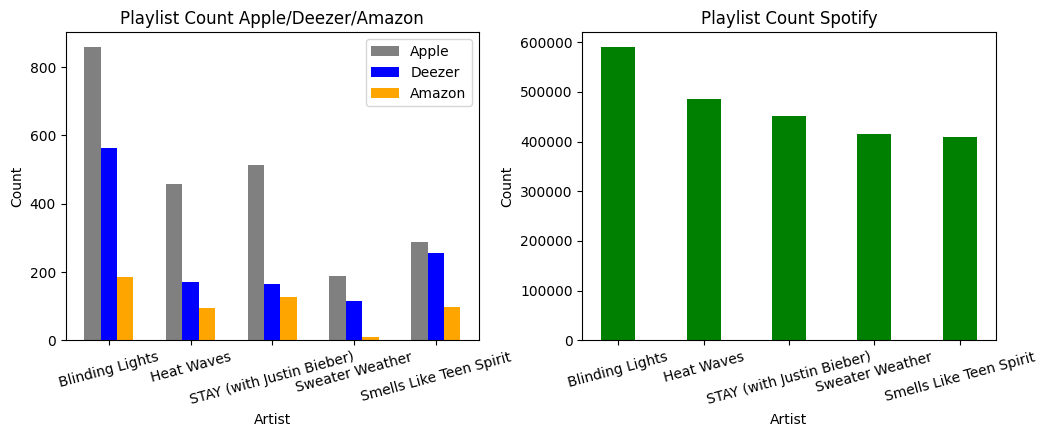

In [363]:
# As Spotify has way more playlist counts than the other three platforms, we will compare them seperately first
f, ax = plt.subplots(1, 2)
ax[0].bar(x_axis - 0.2, observations.apple_music_playlist_count, 0.2, color='grey', align='center')
ax[0].bar(x_axis, observations.deezer_playlist_count, 0.2, color='blue', align='center')
ax[0].bar(x_axis + 0.2, observations.amazon_playlist_count, 0.2, color='orange', align='center')
ax[0].set_xlabel('Artist')
ax[0].set_ylabel('Count')
ax[0].set_xticks(x_axis, x_axis_observations, rotation=15)
ax[0].legend(['Apple', 'Deezer', 'Amazon'], loc='upper right') 
ax[0].set_title('Playlist Count Apple/Deezer/Amazon')
ax[1].bar(observations.track, observations.spotify_playlist_count, width=0.4, color='green')
ax[1].set_xlabel('Artist')
ax[1].set_ylabel('Count')
ax[1].set_title('Playlist Count Spotify')
ax[1].set_xticks(x_axis, x_axis_observations, rotation=15)

f.subplots_adjust(wspace=0.25, hspace=0.5)
f.set_figwidth(12)
f.set_figheight(4)
plt.show()

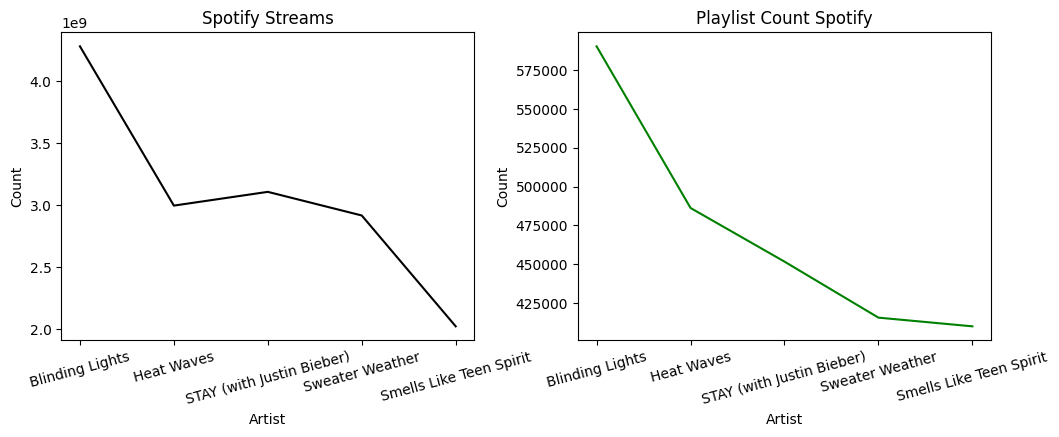

In [364]:
# On the other platforms 'Sweater Weather' did not get as many playlist counts as 'Smells Like Teen Spirit' on any of them
# Unfortunately, we do not have the data to check if there is a correlation with the number of streams for each of those songs on those 3 platforms
# We can check this with Spotify streams though and we'll notice that 'STAY' actually had more streams than 'Heat Waves', despite having less playlist counts
f, ax = plt.subplots(1, 2)
ax[0].plot(observations.track, observations.spotify_streams, color='black')
ax[0].set_xlabel('Artist')
ax[0].set_ylabel('Count')
ax[0].set_xticks(x_axis, x_axis_observations, rotation=15)
ax[0].set_title('Spotify Streams')
ax[1].plot(observations.track, observations.spotify_playlist_count, color='green')
ax[1].set_xlabel('Artist')
ax[1].set_ylabel('Count')
ax[1].set_title('Playlist Count Spotify')
ax[1].set_xticks(x_axis, x_axis_observations, rotation=15)

f.subplots_adjust(wspace=0.25, hspace=0.5)
f.set_figwidth(12)
f.set_figheight(4)
plt.show()

### Problem 7. YouTube views and likes (1 point)
What is the relationship between YouTube views and likes? Present an appropriate plot. 

What is the mean YouTube views-to-likes ratio? What is its distribution? Find a way to plot it and describe it.

In [370]:
df_yt = df[['artist', 'track', 'youtube_views', 'youtube_likes']].sort_values(by='youtube_views', ascending=False)
df_yt

,artist,track,youtube_views,youtube_likes
27,Pinkfong,Baby Shark,16322756555,48757673
49,Luis Fonsi,Despacito,9537135721,61799279
53,Ed Sheeran,Shape of You,8013997219,45770887
14,Kids With Buns,bathroom floor,6736502312,16785489
80,Ed Sheeran,Perfect,6473698897,39632673
...,...,...,...,...
482,Peso Pluma,La Bebe (Remix) [Apple Music Live],0,0
1181,Linkin Park,Papercut,0,0
4302,The Platters,Smoke Gets in Your Eyes,0,0
4301,21 Savage,redrum,0,0


In [386]:
mean_yt_views = df_yt.loc[:, 'youtube_views'].mean()
mean_yt_likes = df_yt.loc[:, 'youtube_likes'].mean()
mean_yt_ratio_views_likes = mean_yt_views / mean_yt_likes
mean_yt_ratio_views_likes

137.69557832664907

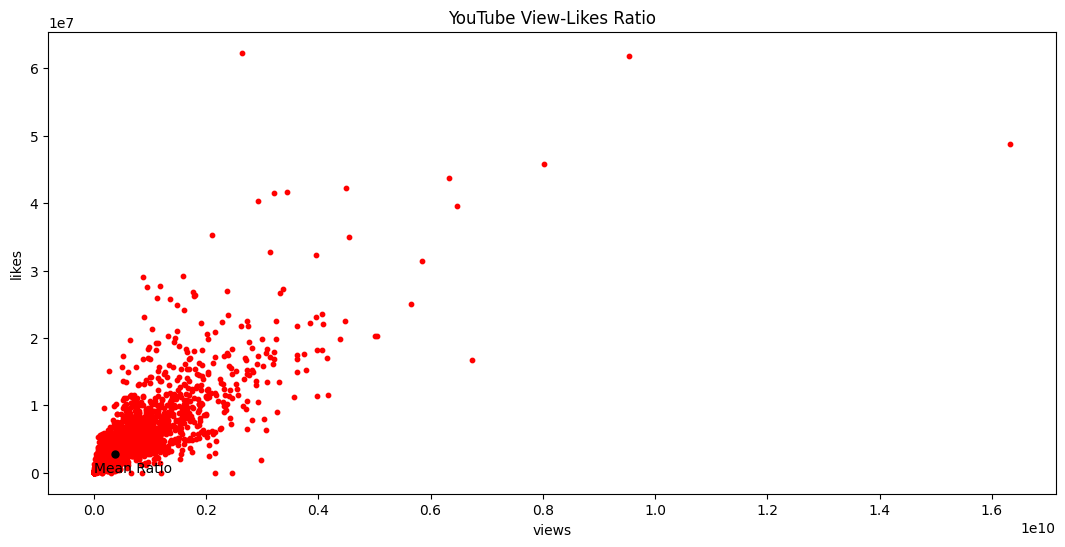

In [406]:
plt.figure(figsize=(13, 6))
plt.scatter(df_yt.youtube_views, df_yt.youtube_likes, s=10, color='red')
plt.scatter(mean_yt_views, mean_yt_likes, s=25, color='black', )
plt.xlabel('views')
plt.ylabel('likes')
plt.annotate('Mean Ratio', xy=(0, 0))
plt.title('YouTube View-Likes Ratio')
plt.show()

In [409]:
# We can see that the mean for views and likes is a lot closer to zero than the maximum values
# Given how grand some of the larger values are, the mean ratio could be siginificantly closer to zero if some of the outliers were ignored
# One interesting thing we notice is that the song with the most likes has nowhere near as many views as any of say the top 10 most viewed tracks
# Let's see which song that is

df[['track', 'artist', 'youtube_views', 'youtube_likes']].loc[df_yt['youtube_likes'].idxmax()]

track              Dynamite
artist                  BTS
youtube_views    2638957320
youtube_likes      62311179
Name: 130, dtype: object

### Problem 8. TikTok stuff (2 points)
The most popular songs on TikTok released every year show... interesting behavior. Which years peaked the most TikTok views? Show an appropriate chart. Can you explain this behavior? For a bit of context, TikTok was created in 2016.

Now, how much popular is the most popular song for each release year, than the mean popularity? Analyze the results.

In both parts, it would be helpful to see the actual songs.

### * Problem 9. Explore (and clean) at will
There is a lot to look for here. For example, you can easily link a song to its genres, and lyrics. You may also try to link artists and albums to more info about them. Or you can compare and contrast a song's performance across different platforms, in a similar manner to what you already did above; maybe even assign a better song ranking system (across platforms with different popularity metrics, and different requirements) than the one provided in the dataset.